In [1]:
#  import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import diffrent models
import sklearn
from sklearn.linear_model import LinearRegression
# import regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# import  ensemble regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# import diffrent model selection method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# import error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
# loaded dataset
ds=pd.read_csv('Advertising Sales Channel.csv')
# put into aframe
df=pd.DataFrame(data=ds)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)    #remove unnecessary column

In [7]:
df   #after removed unnecessary columns 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.shape #check shape of dataset

(200, 4)

dataset divided into 4 columns and 200 rows

In [9]:
df.head()    #check upper top 5 row of dataset

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


By code head parameter ,dataset top 5 row 

In [10]:
df.tail()  #check lower 5 rows of dataset

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


By code tail parameter see dataset last 5 row

In [11]:
df.sample()  #random row

,TV,radio,newspaper,sales
41,177.0,33.4,38.7,17.1


By code sample parameter it generate any random number row into dataset

In [12]:
df.info()    #alll information of dataset like null_value,dtype  etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


By info parameter we get that all 4 variable have float data_type and there is no null value are present

In [13]:
df.dtypes   #check data type separetly

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [14]:
type(df)  #check full daatset type

pandas.core.frame.DataFrame

In [15]:
df.isnull().sum()   #check null value in dataset

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no value are present

<AxesSubplot:>

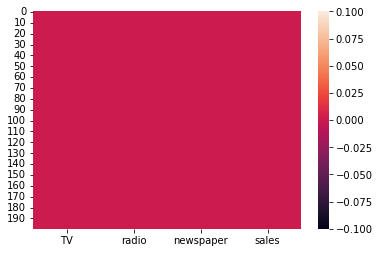

In [16]:
sns.heatmap(df.isnull())  #ploting null value in visulaization 

By the help of ploting analysis of null value

# UNIQUE VALUE

In [17]:
df['TV'].unique()   #UNIQUE VALUE OF TV

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [18]:
df['radio'].unique()   #chck unique value of radio variable

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [19]:
df['newspaper'].unique()   #check unique value of newspaper variable

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [20]:
df['sales'].unique() #check unique value of sales variable

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

# DESCRIBE DATASET

In [21]:
df.describe()     #DESCRIB DATSET for know more featute like mean median outliers etc

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# VIZULAIZATION-  UNI-VARIENT ANALYSIS

BOX-PLOT

In [22]:
col=df.columns
nrow=15     #dimension
ncol=30

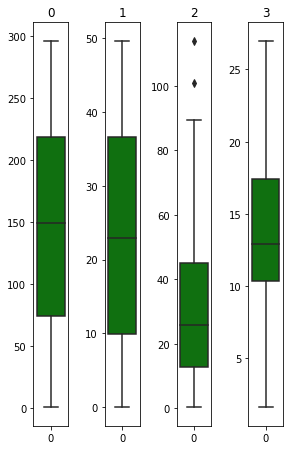

In [23]:
plt.figure(figsize=(ncol,ncol*3))   #plotting box plot for find outliers
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='g',orient='v')
    plt.tight_layout()

Here see that in dataset in only one variable newspaper have outliers,other have no outliers

remove outliers from newspaper later

HIST-PLOT

<AxesSubplot:xlabel='TV', ylabel='Count'>

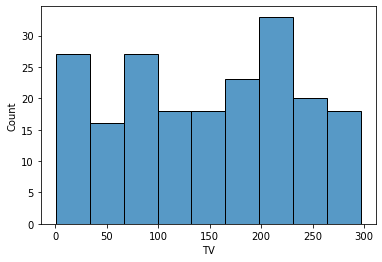

In [24]:
sns.histplot(df.TV)   #find skewness in tv variable columns

tv variable not set in normal distribution shape

<AxesSubplot:xlabel='radio', ylabel='Count'>

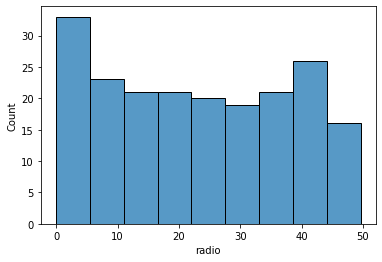

In [25]:
sns.histplot(df.radio)   #find skewness in radio variable columns

radio variable not set in normal distribution shape

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

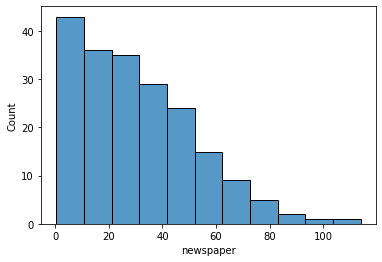

In [26]:
sns.histplot(df.newspaper)  #find skewness in newspaper columns

newspaper variable not set in normal distribution ,and it have right skewness is present

<AxesSubplot:xlabel='sales', ylabel='Count'>

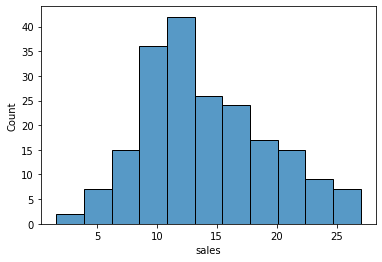

In [27]:
sns.histplot(df.sales)  #find skeness in sales columns

DIST-PLOT

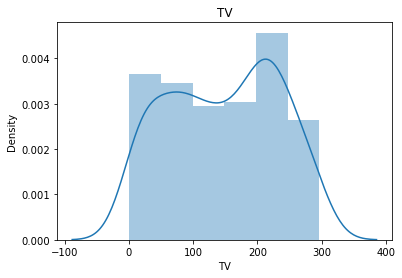

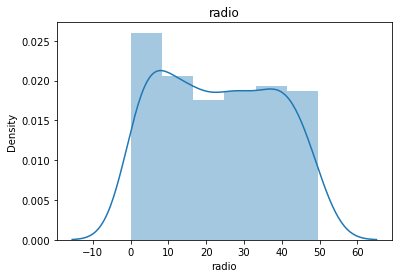

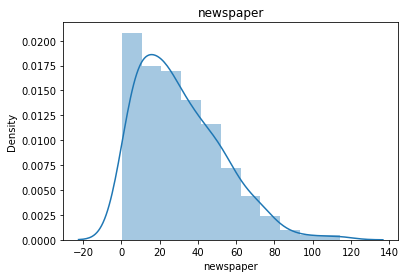

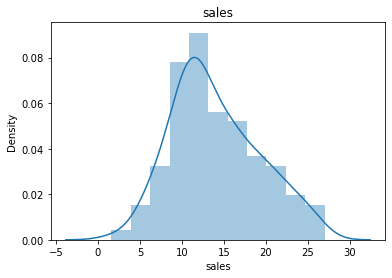

In [28]:
for i in col:
    plt.figure()
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

# CORELATION IN DATASET VARIABLE

In [29]:
df.corr()  #check relation between dataset variable

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


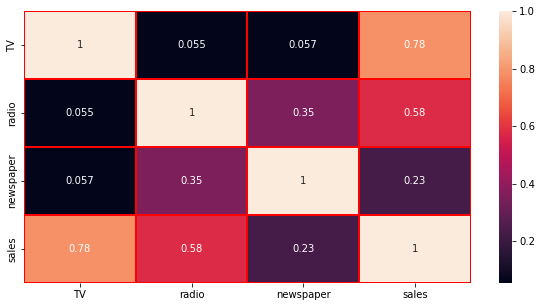

In [30]:
plt.figure(figsize=(10,5))   #dimension of heatmap
sns.heatmap(data=df.corr(),linewidth=2,linecolor='r',annot=True)   #plot heatmap
plt.show()

# BI-VARIENT ANALYSIS

SCATTER-PLOT

<AxesSubplot:xlabel='TV', ylabel='sales'>

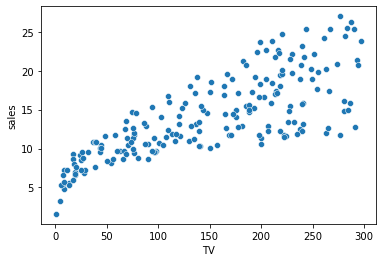

In [31]:
sns.scatterplot(data=df,x='TV',y='sales')    #plot curve between two variable

TV has a positive correlation with sales, as the TV advisement increases, sales increases

<AxesSubplot:xlabel='radio', ylabel='sales'>

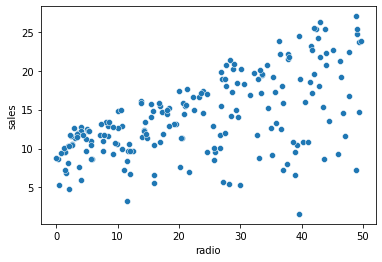

In [32]:
sns.scatterplot(data=df,x='radio',y='sales')   #plot betwween 2 variable

although radio have positive correlation with sales, if radio advertisement increase sales also increase

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

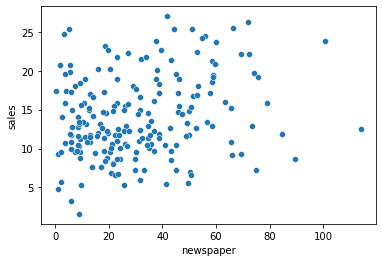

In [33]:
sns.scatterplot(data=df,x='newspaper',y='sales')  #plot between nespaper and sales

data is scattered all over, clearly not visible if newspaper have any good correlation with sales.need to advertisment on newpaper

# MULTIVARIENT ANALYSIS

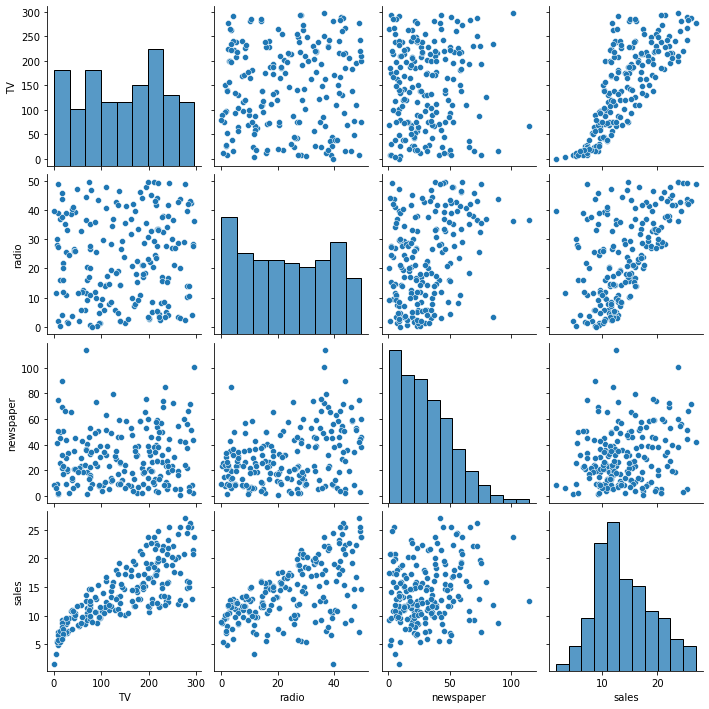

In [34]:
# multi-varient analysis
sns.pairplot(df)

# CHECK MULTICOLONILITY

In [35]:
x=df.drop('sales',axis=1)  #WE NOT APPLY ANY FEATURE ENGINEERING ON TARGET SO REMOVED IT 

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   #import variance inflation for check multicolonility

In [37]:
def vif(x):
    VIF= pd.DataFrame()
    VIF['features']= x.columns
    VIF['VIF_FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(VIF)

In [38]:
vif(x)

,features,VIF_FACTOR
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


No multicolonility found between variable

# CHECK SKEWNESS

In [39]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# OUTLIERS

In [40]:
from scipy.stats import zscore   #remove outliers by zscore method

In [41]:
z=np.abs(zscore(df))

In [42]:
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [43]:
df_new=df[(z<3).all(axis=1)]   #remove outliervalue >3
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [44]:
df.shape  #check shape before removing outliers

(200, 4)

This shape is our dataset before removing outliers have 200 rows and 4 columns

In [45]:
df_new.shape  #check shape after removing outliers

(198, 4)

After removing outliers our dataset new shape have 198 rows and 4 columns

In [46]:
data_loss=((200-198)/200)*100   #check daatset loss during outluers removing
print('Data_loss:',data_loss)

Data_loss: 1.0


Removing outliers by zscore method our data loss is 1%,it is not good but not bad also. 

<AxesSubplot:xlabel='newspaper'>

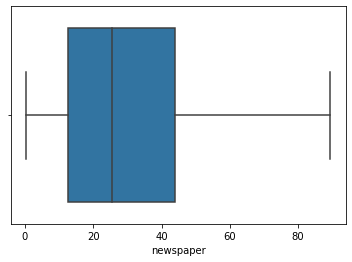

In [47]:
sns.boxplot(df_new.newspaper)  #check outliers by graph

Outliers removed by zscore but here 1% data loss occur so we try another method

## Try another method to remove outliers.for best result

# OUTLIERS-IQR METHOD

Outlier is present in only one vaeiable 'NEWSPAPER'

In [48]:
Q1=df['newspaper'].quantile(0.25)  #check 25% value
Q1

12.75

In [49]:
Q2=df['newspaper'].quantile(0.75)   #check 75% value
Q2

45.1

In [50]:
IQR=Q2-Q1
IQR  #get 50% value

32.35

In [51]:
upper = Q2+(1.5*IQR)  #remove outliers
lower = Q1-(1.5*IQR)
df = df[(df.newspaper>lower) & (df.newspaper<upper)] 

In [52]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [53]:
df.isnull().sum()  #no null value present after remove outliers

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:xlabel='newspaper'>

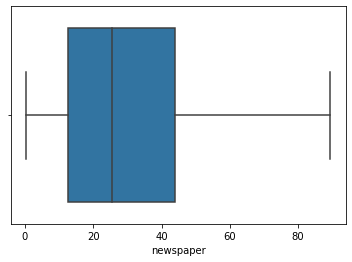

In [54]:
sns.boxplot(df.newspaper)   #check outliers 

As we see that our outliers are completery removed with 1% data loss.So we take this method bcoz our data is completery free 
from outliers and  1% data loss occur

In [55]:
df.shape

(198, 4)

In [56]:
df.shape

(198, 4)

In [57]:
data_loss=((200-198)/200)*100
print('Data_loss:',data_loss)

Data_loss: 1.0


# SKEWNESS

In [58]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Before removing outliers from dataset radio and newwspaper have more skewed in positive side

In [59]:
df_new.skew()  #check oskewness after remove outliers

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

After removing outliers by zscore and iqr method , in  dataset  newspaper have skewed in positive side

In [60]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

After removing outliers by IQR , in  dataset  newspaper have skewed in positive side

Target of the skewness:-Skewness threshold is taken is +/-0.5.Columns which are having skewness

# Separate independent and dependent variable for further analysis process

In [61]:
x=df.drop('sales',axis=1)   #drop target bcoz not apply any feature engineering

In [62]:
y=df.sales

In [63]:
type(x)

pandas.core.frame.DataFrame

In [64]:
type(y)

pandas.core.series.Series

dependent variable is not in dataframe,so we convert it

In [65]:
y=pd.DataFrame(y)   #put into frame 

In [66]:
type(y)

pandas.core.frame.DataFrame

# REMOVE SKWENESS 

In [67]:
from sklearn.preprocessing import power_transform

In [68]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

skewness before apply transform method

# Before apply transform method change into scaler form

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
st=StandardScaler()

In [71]:
x1=st.fit_transform(x)

In [72]:
x1

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

Now apply power transform method

In [73]:
x=power_transform(x1)
x

array([[ 9.80756116e-01,  9.90945814e-01,  1.65837879e+00],
       [-1.18627526e+00,  1.08453564e+00,  8.55744818e-01],
       [-1.48299995e+00,  1.49066170e+00,  1.66132107e+00],
       [ 2.34439444e-02,  1.20854115e+00,  1.32754319e+00],
       [ 3.73913645e-01, -8.23792563e-01,  1.32428569e+00],
       [-1.57467136e+00,  1.67255264e+00,  1.82506451e+00],
       [-1.04363123e+00,  6.74939468e-01, -1.59747191e-01],
       [-3.40356586e-01, -2.00436290e-01, -9.31086978e-01],
       [-1.57574795e+00, -1.46307816e+00, -1.73124574e+00],
       [ 6.05527495e-01, -1.42582015e+00, -2.97353682e-01],
       [-9.48741584e-01, -1.18879492e+00, -1.19035138e-01],
       [ 7.89207956e-01,  9.96403877e-02, -1.49482006e+00],
       [-1.41159397e+00,  8.21118149e-01,  1.55983188e+00],
       [-5.98287968e-01, -1.05660653e+00, -1.25116313e+00],
       [ 6.58360645e-01,  6.81326008e-01,  8.90014413e-01],
       [ 5.51619074e-01,  1.59998293e+00,  1.13957182e+00],
       [ 1.62964785e+00,  1.10319214e+00

Check skewness after apply power transform method

In [74]:
type(x)

numpy.ndarray

first convert into dataframe

In [75]:
x=pd.DataFrame(x)
x

,0,1,2
0,0.980756,0.990946,1.658379
1,-1.186275,1.084536,0.855745
2,-1.483000,1.490662,1.661321
3,0.023444,1.208541,1.327543
4,0.373914,-0.823793,1.324286
...,...,...,...
193,-1.255078,-1.344061,-0.777799
194,-0.635441,-1.255203,-1.184262
195,0.327974,-0.932563,-1.311236
196,1.657808,1.251742,1.568910


In [76]:
x.skew()

0   -0.010409
1    0.029721
2    0.094454
dtype: float64

As we see skewness is reduced upto requried  range upto  +/-0.5 .

# CHANGE INTO SCALER

In [77]:
x=st.fit_transform(x)
x

array([[ 9.80756116e-01,  9.90945814e-01,  1.65837879e+00],
       [-1.18627526e+00,  1.08453564e+00,  8.55744818e-01],
       [-1.48299995e+00,  1.49066170e+00,  1.66132107e+00],
       [ 2.34439444e-02,  1.20854115e+00,  1.32754319e+00],
       [ 3.73913645e-01, -8.23792563e-01,  1.32428569e+00],
       [-1.57467136e+00,  1.67255264e+00,  1.82506451e+00],
       [-1.04363123e+00,  6.74939468e-01, -1.59747191e-01],
       [-3.40356586e-01, -2.00436290e-01, -9.31086978e-01],
       [-1.57574795e+00, -1.46307816e+00, -1.73124574e+00],
       [ 6.05527495e-01, -1.42582015e+00, -2.97353682e-01],
       [-9.48741584e-01, -1.18879492e+00, -1.19035138e-01],
       [ 7.89207956e-01,  9.96403877e-02, -1.49482006e+00],
       [-1.41159397e+00,  8.21118149e-01,  1.55983188e+00],
       [-5.98287968e-01, -1.05660653e+00, -1.25116313e+00],
       [ 6.58360645e-01,  6.81326008e-01,  8.90014413e-01],
       [ 5.51619074e-01,  1.59998293e+00,  1.13957182e+00],
       [ 1.62964785e+00,  1.10319214e+00

In [78]:
x.shape

(198, 3)

In [79]:
y.shape

(198, 1)

# MACHINE LEARNING--Apply diffrent model for predict data

In [80]:
LI= LinearRegression()
DT= DecisionTreeRegressor()
SV= SVR()
KNR= KNeighborsRegressor()
RF=RandomForestRegressor()
AD=AdaBoostRegressor()
GR=GradientBoostingRegressor()

# MODEL-LINAER REGRESSION

In [81]:
LI=LinearRegression()

In [82]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    LI.fit(x_train,y_train)
    train_pred=LI.predict(x_train)
    test_pred=LI.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.903956289354241 Random_state at 0
Max accuracy 0.903956289354241 Max_Random_state 0


Accuracy 0.8820389571331082 Random_state at 1
Accuracy 0.8315354783811238 Random_state at 2
Accuracy 0.8902565998534641 Random_state at 3
Accuracy 0.8630764992881643 Random_state at 4
Accuracy 0.8494680168936745 Random_state at 5
Accuracy 0.8681406766571547 Random_state at 6
Accuracy 0.8995185803332276 Random_state at 7
Accuracy 0.8545459041014518 Random_state at 8
Accuracy 0.9123726070011172 Random_state at 9
Max accuracy 0.9123726070011172 Max_Random_state 9


Accuracy 0.7732114334289236 Random_state at 10
Accuracy 0.9168825006187449 Random_state at 11
Max accuracy 0.9168825006187449 Max_Random_state 11


Accuracy 0.8926130069205616 Random_state at 12
Accuracy 0.8312964067905848 Random_state at 13
Accuracy 0.9057386842547559 Random_state at 14
Accuracy 0.8966532317012583 Random_state at 15
Accuracy 0.9012275545420234 Random_state at 16
Accuracy 0.9129131764944154 Random_state at 17
Accura

At random state 24 model give me 94.199% accuracy

In [83]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
LI.fit(x_train,y_train)
test_pred-LI.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',LI.score(x_train,y_train)*100)

Mean_absolute_error--> 0.9927036596307858
Mean_square_error--> 1.4925741573110143
Root_mean_square_error--> 1.2217095224770143
R2 Score of--> 94.19948305170335
Data Set accuracy with this model--> 87.2953304988443


By Linear regression we get model accuracy is 94.19 and with this model our dataset working with 87.29%
mean_absolut_error is near 0.99 and square error is 1.49

# MODEL-DECISION TREE REGREESOR

In [84]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    test_pred=DT.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.9495303609750857 Random_state at 0
Max accuracy 0.9495303609750857 Max_Random_state 0


Accuracy 0.9552148608908528 Random_state at 1
Max accuracy 0.9552148608908528 Max_Random_state 1


Accuracy 0.9520121364200341 Random_state at 2
Accuracy 0.9320601324860411 Random_state at 3
Accuracy 0.9196239989042914 Random_state at 4
Accuracy 0.9653875045329742 Random_state at 5
Max accuracy 0.9653875045329742 Max_Random_state 5


Accuracy 0.9438648261709698 Random_state at 6
Accuracy 0.9766204884353785 Random_state at 7
Max accuracy 0.9766204884353785 Max_Random_state 7


Accuracy 0.9384860642216607 Random_state at 8
Accuracy 0.9721759410800049 Random_state at 9
Accuracy 0.9687681634831979 Random_state at 10
Accuracy 0.9540598223165572 Random_state at 11
Accuracy 0.9293463953969388 Random_state at 12
Accuracy 0.9308542605709379 Random_state at 13
Accuracy 0.9659045067516591 Random_state at 14
Accuracy 0.9473677108953946 Random_state at 15
Accuracy 0.9669350306793 Random_state at 16
Ac

In [107]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
DT.fit(x_train,y_train)
test_pred-DT.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',DT.score(x_train,y_train)*100)

Mean_absolute_error--> 0.5315499999999982
Mean_square_error--> 0.4681433999999961
Root_mean_square_error--> 0.6842100554654221
R2 Score of--> 98.1806775143251
Data Set accuracy with this model--> 100.0


By Decision tree regressor we get model accuracy is 98.18% and with this model our dataset working with 100%
mean_absolut_error is near 0.53% and square error is 0.46% 

# MODEL-SUPPORT VECTOR CLASSIFIER

In [86]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    test_pred=SV.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.9144550095292608 Random_state at 0
Max accuracy 0.9144550095292608 Max_Random_state 0


Accuracy 0.94490449398786 Random_state at 1
Max accuracy 0.94490449398786 Max_Random_state 1


Accuracy 0.8877187169281597 Random_state at 2
Accuracy 0.9390897593059303 Random_state at 3
Accuracy 0.9403458839879547 Random_state at 4
Accuracy 0.8908007980644748 Random_state at 5
Accuracy 0.9111017496722447 Random_state at 6
Accuracy 0.8859849966427669 Random_state at 7
Accuracy 0.8602490459965346 Random_state at 8
Accuracy 0.9495923466411514 Random_state at 9
Max accuracy 0.9495923466411514 Max_Random_state 9


Accuracy 0.8287803895768 Random_state at 10
Accuracy 0.9338549754833433 Random_state at 11
Accuracy 0.901673643833458 Random_state at 12
Accuracy 0.9092024291375979 Random_state at 13
Accuracy 0.8544735905665333 Random_state at 14
Accuracy 0.8965131703783029 Random_state at 15
Accuracy 0.9063864865058524 Random_state at 16
Accuracy 0.9505780137922593 Random_state at 17
Max accuracy 

At random state 24 model give me 95.09% accuracy

In [87]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
SV.fit(x_train,y_train)
test_pred-SV.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',SV.score(x_train,y_train)*100)

Mean_absolute_error--> 0.6909089947826607
Mean_square_error--> 1.2621922637878775
Root_mean_square_error--> 1.1234733035492555
R2 Score of--> 95.09480478256404
Data Set accuracy with this model--> 91.48435623697284


By Support vector regressor we get model accuracy is 95.09% and with this model our dataset working with 91.48%
mean_absolut_error is near 0.69% and square error is 1.26% 

# MODEL-KNEIGHBOUR REGRESSOR

In [88]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    KNR.fit(x_train,y_train)
    test_pred=KNR.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.952492036837557 Random_state at 0
Max accuracy 0.952492036837557 Max_Random_state 0


Accuracy 0.9650502702120125 Random_state at 1
Max accuracy 0.9650502702120125 Max_Random_state 1


Accuracy 0.9133469340942345 Random_state at 2
Accuracy 0.9694205550386457 Random_state at 3
Max accuracy 0.9694205550386457 Max_Random_state 3


Accuracy 0.9458708361266697 Random_state at 4
Accuracy 0.879959073719111 Random_state at 5
Accuracy 0.9223333727119444 Random_state at 6
Accuracy 0.9234568096787376 Random_state at 7
Accuracy 0.8955149485348844 Random_state at 8
Accuracy 0.9538732695070822 Random_state at 9
Accuracy 0.8753137943105838 Random_state at 10
Accuracy 0.9613875286168084 Random_state at 11
Accuracy 0.9421616336354406 Random_state at 12
Accuracy 0.911210130929384 Random_state at 13
Accuracy 0.9311211911250712 Random_state at 14
Accuracy 0.9008172895286707 Random_state at 15
Accuracy 0.9270929660680336 Random_state at 16
Accuracy 0.9603727161829673 Random_state at 17
Accuracy 

At random state 22 model give me 97.01% accuracy

In [89]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
KNR.fit(x_train,y_train)
test_pred-KNR.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',KNR.score(x_train,y_train)*100)

Mean_absolute_error--> 0.7325000000000003
Mean_square_error--> 0.9895700000000012
Root_mean_square_error--> 0.9947713305076705
R2 Score of--> 96.15428317017964
Data Set accuracy with this model--> 95.24043104621508


By Kneighbors regressor we get model accuracy is 96.15% and with this model our dataset working with 95.24%
mean_absolut_error is near 0.73% and square error is 0.98% 

# MODEL-ADA BOOST REGRESSOR

In [90]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    test_pred=AD.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.9608645452916349 Random_state at 0
Max accuracy 0.9608645452916349 Max_Random_state 0


Accuracy 0.959563616414547 Random_state at 1
Accuracy 0.9458169448349183 Random_state at 2
Accuracy 0.9619370701575539 Random_state at 3
Max accuracy 0.9619370701575539 Max_Random_state 3


Accuracy 0.9403743536540837 Random_state at 4
Accuracy 0.956880897252334 Random_state at 5
Accuracy 0.9457809916131779 Random_state at 6
Accuracy 0.9664469257054347 Random_state at 7
Max accuracy 0.9664469257054347 Max_Random_state 7


Accuracy 0.961491567008753 Random_state at 8
Accuracy 0.9714162575628633 Random_state at 9
Max accuracy 0.9714162575628633 Max_Random_state 9


Accuracy 0.95827434554622 Random_state at 10
Accuracy 0.9624486905706429 Random_state at 11
Accuracy 0.9716045655686528 Random_state at 12
Max accuracy 0.9716045655686528 Max_Random_state 12


Accuracy 0.9526175146288025 Random_state at 13
Accuracy 0.9713861511647863 Random_state at 14
Accuracy 0.9487605193201876 Random_state at 

At random state 24 model give me 96.04% accuracy

In [91]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
AD.fit(x_train,y_train)
test_pred-AD.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',AD.score(x_train,y_train)*100)

Mean_absolute_error--> 0.8071457813098734
Mean_square_error--> 1.0181569314537935
Root_mean_square_error--> 1.0090376263815901
R2 Score of--> 96.04318719576167
Data Set accuracy with this model--> 97.80607380076836


By Ada boost regressor we get model accuracy is 96.04% and with this model our dataset working with 97.80%
mean_absolut_error is near 0.80% and square error is 1.01% 

# MODEL-GRADIENT BOOSTING REGRESSOR

In [92]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    test_pred=GR.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.9814415332304267 Random_state at 0
Max accuracy 0.9814415332304267 Max_Random_state 0


Accuracy 0.9859986192395693 Random_state at 1
Max accuracy 0.9859986192395693 Max_Random_state 1


Accuracy 0.971909390555159 Random_state at 2
Accuracy 0.979132258304435 Random_state at 3
Accuracy 0.9753735058435175 Random_state at 4
Accuracy 0.9835769302139138 Random_state at 5
Accuracy 0.9605314334309811 Random_state at 6
Accuracy 0.9855163979943643 Random_state at 7
Accuracy 0.9678140376601798 Random_state at 8
Accuracy 0.9880097065112937 Random_state at 9
Max accuracy 0.9880097065112937 Max_Random_state 9


Accuracy 0.9676236866681119 Random_state at 10
Accuracy 0.9843844885848105 Random_state at 11
Accuracy 0.9815161804177799 Random_state at 12
Accuracy 0.9619909816316968 Random_state at 13
Accuracy 0.9873896813882278 Random_state at 14
Accuracy 0.9710759128069099 Random_state at 15
Accuracy 0.9813166595031363 Random_state at 16
Accuracy 0.9853713667704658 Random_state at 17
Accurac

In [93]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
GR.fit(x_train,y_train)
test_pred-GR.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',GR.score(x_train,y_train)*100)

Mean_absolute_error--> 0.5205439502339229
Mean_square_error--> 0.4181523435925696
Root_mean_square_error--> 0.6466470007605151
R2 Score of--> 98.37495527837063
Data Set accuracy with this model--> 99.86596198243318


By Gradient boosting regressor we get model accuracy is 98.37% and with this model our dataset working with 99.86%
mean_absolut_error is near 0.52% and square error is 0.41% 

# MODEL-RANDOM FOREST REGRESSOR

In [94]:
maxacc=0
maxrand=0

for i in range(0,25):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    test_pred=RF.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.979343706670347 Random_state at 0
Max accuracy 0.979343706670347 Max_Random_state 0


Accuracy 0.9825940247347918 Random_state at 1
Max accuracy 0.9825940247347918 Max_Random_state 1


Accuracy 0.9689789993361809 Random_state at 2
Accuracy 0.9755342994048781 Random_state at 3
Accuracy 0.969871813614181 Random_state at 4
Accuracy 0.9796247722720131 Random_state at 5
Accuracy 0.9675887650344371 Random_state at 6
Accuracy 0.9821530985772713 Random_state at 7
Accuracy 0.9705542038753411 Random_state at 8
Accuracy 0.987384963824278 Random_state at 9
Max accuracy 0.987384963824278 Max_Random_state 9


Accuracy 0.9744073592717228 Random_state at 10
Accuracy 0.9861054514174731 Random_state at 11
Accuracy 0.9832727953066828 Random_state at 12
Accuracy 0.9662791875939044 Random_state at 13
Accuracy 0.9857450955394399 Random_state at 14
Accuracy 0.9647930570869026 Random_state at 15
Accuracy 0.982762763330998 Random_state at 16
Accuracy 0.9860559272417763 Random_state at 17
Accuracy 0.

In [118]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=24)
RF.fit(x_train,y_train)
test_pred-RF.predict(x_test)
print('Mean_absolute_error-->',mean_absolute_error(y_test,test_pred))
print('Mean_square_error-->',mean_squared_error(y_test,test_pred))
print('Root_mean_square_error-->',np.sqrt( mean_squared_error(y_test,test_pred)))
print('R2 Score of-->',r2_score(y_test,test_pred )*100)
print('Data Set accuracy with this model-->',RF.score(x_train,y_train)*100)

Mean_absolute_error--> 0.5315499999999982
Mean_square_error--> 0.4681433999999961
Root_mean_square_error--> 0.6842100554654221
R2 Score of--> 98.1806775143251
Data Set accuracy with this model--> 99.60670881758271


By Random forest regressor we get model accuracy is 98.18% and with this model our dataset working with 99.66%
mean_absolut_error is near 0.54% and square error is 0.46% 

## Improve in this accuracy and error with use cross_val_score method

# CROSS VALIDATION-LINEAR REGRESSION

In [96]:
test_pred=LI.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(LI,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.882622823735108 and the test accuracy is 0.9419948305170335


At cross fold  model 3 the mean_score is:0.8818647976268766 and the test accuracy is 0.9419948305170335


At cross fold  model 4 the mean_score is:0.8810762158735431 and the test accuracy is 0.9419948305170335


At cross fold  model 5 the mean_score is:0.8786939310034242 and the test accuracy is 0.9419948305170335


At cross fold  model 6 the mean_score is:0.8794293330070778 and the test accuracy is 0.9419948305170335


At cross fold  model 7 the mean_score is:0.8763050849846443 and the test accuracy is 0.9419948305170335


At cross fold  model 8 the mean_score is:0.8809739451492923 and the test accuracy is 0.9419948305170335


At cross fold  model 9 the mean_score is:0.8731355781983317 and the test accuracy is 0.9419948305170335




# MODEL-DECISION TREE REGRESSOR

In [97]:
test_pred=DT.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(DT,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.9142646533054452 and the test accuracy is 0.9759538255156144


At cross fold  model 3 the mean_score is:0.9447889685941365 and the test accuracy is 0.9759538255156144


At cross fold  model 4 the mean_score is:0.9404519864085303 and the test accuracy is 0.9759538255156144


At cross fold  model 5 the mean_score is:0.9535154954590246 and the test accuracy is 0.9759538255156144


At cross fold  model 6 the mean_score is:0.9448509205763042 and the test accuracy is 0.9759538255156144


At cross fold  model 7 the mean_score is:0.9489729024603929 and the test accuracy is 0.9759538255156144


At cross fold  model 8 the mean_score is:0.9450692174598012 and the test accuracy is 0.9759538255156144


At cross fold  model 9 the mean_score is:0.9391025006150594 and the test accuracy is 0.9759538255156144




# MODEL=SUPPORT VECTOR REGRESSOR

In [98]:
test_pred=SV.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(SV,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.8522467874031697 and the test accuracy is 0.9509480478256404


At cross fold  model 3 the mean_score is:0.8916836410304713 and the test accuracy is 0.9509480478256404


At cross fold  model 4 the mean_score is:0.897199491503716 and the test accuracy is 0.9509480478256404


At cross fold  model 5 the mean_score is:0.9047226797314373 and the test accuracy is 0.9509480478256404


At cross fold  model 6 the mean_score is:0.9092650791112313 and the test accuracy is 0.9509480478256404


At cross fold  model 7 the mean_score is:0.9063528759220337 and the test accuracy is 0.9509480478256404


At cross fold  model 8 the mean_score is:0.9088036953521962 and the test accuracy is 0.9509480478256404


At cross fold  model 9 the mean_score is:0.9125820422671305 and the test accuracy is 0.9509480478256404




# MODEL=KNEIGHBORS REGRESSOR

In [99]:
test_pred=KNR.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(KNR,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.9172820404958582 and the test accuracy is 0.9615428317017963


At cross fold  model 3 the mean_score is:0.9126388076441874 and the test accuracy is 0.9615428317017963


At cross fold  model 4 the mean_score is:0.9404239718064459 and the test accuracy is 0.9615428317017963


At cross fold  model 5 the mean_score is:0.938558239283401 and the test accuracy is 0.9615428317017963


At cross fold  model 6 the mean_score is:0.9331970185649375 and the test accuracy is 0.9615428317017963


At cross fold  model 7 the mean_score is:0.9401330063945298 and the test accuracy is 0.9615428317017963


At cross fold  model 8 the mean_score is:0.9391553015281419 and the test accuracy is 0.9615428317017963


At cross fold  model 9 the mean_score is:0.9300034738202514 and the test accuracy is 0.9615428317017963




# MODEL=ADA BOOST REGRESSOR

In [100]:
test_pred=AD.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(AD,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.9482026953690135 and the test accuracy is 0.9556052232362032


At cross fold  model 3 the mean_score is:0.9536807971161007 and the test accuracy is 0.9556052232362032


At cross fold  model 4 the mean_score is:0.9565071198544493 and the test accuracy is 0.9556052232362032


At cross fold  model 5 the mean_score is:0.9525110363411894 and the test accuracy is 0.9556052232362032


At cross fold  model 6 the mean_score is:0.9571493656047444 and the test accuracy is 0.9556052232362032


At cross fold  model 7 the mean_score is:0.9564609249107496 and the test accuracy is 0.9556052232362032


At cross fold  model 8 the mean_score is:0.9545344771336793 and the test accuracy is 0.9556052232362032


At cross fold  model 9 the mean_score is:0.9533713959535598 and the test accuracy is 0.9556052232362032




# MODEL-GRADIENT BOOSTING REGRESSOR

In [101]:
test_pred=GR.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(GR,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.9737186204457509 and the test accuracy is 0.983754014396373


At cross fold  model 3 the mean_score is:0.9766228606495336 and the test accuracy is 0.983754014396373


At cross fold  model 4 the mean_score is:0.9792066501881977 and the test accuracy is 0.983754014396373


At cross fold  model 5 the mean_score is:0.978205543248235 and the test accuracy is 0.983754014396373


At cross fold  model 6 the mean_score is:0.9768734716844366 and the test accuracy is 0.983754014396373


At cross fold  model 7 the mean_score is:0.9771334444665483 and the test accuracy is 0.983754014396373


At cross fold  model 8 the mean_score is:0.9791506148853282 and the test accuracy is 0.983754014396373


At cross fold  model 9 the mean_score is:0.976772250813035 and the test accuracy is 0.983754014396373




# MODEL-RANDOM FOREST REGRESSOR

In [102]:
test_pred=RF.predict(x_test)
test_accuracy=r2_score(y_test,test_pred) 
for i in range(2,10):
    cv_score=cross_val_score(RF,x,y,cv=i)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {test_accuracy}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.9708948088162226 and the test accuracy is 0.981806775143251


At cross fold  model 3 the mean_score is:0.9739736947146311 and the test accuracy is 0.981806775143251


At cross fold  model 4 the mean_score is:0.9766604788229711 and the test accuracy is 0.981806775143251


At cross fold  model 5 the mean_score is:0.9767163004257838 and the test accuracy is 0.981806775143251


At cross fold  model 6 the mean_score is:0.9770581623849431 and the test accuracy is 0.981806775143251


At cross fold  model 7 the mean_score is:0.976058121519462 and the test accuracy is 0.981806775143251


At cross fold  model 8 the mean_score is:0.9785645995821282 and the test accuracy is 0.981806775143251


At cross fold  model 9 the mean_score is:0.9772098782934984 and the test accuracy is 0.981806775143251




## In cv score Gradient boosting regressor value is  give highest accuracy 98.18% and it little bit high with spliting data formate

# Hyperparameter tuning of Grandient Boosting Regressor

In [103]:
dict1={'max_features':['auto','sqrt','log2'],'n_estimators':[100,200,300,400,500],
      'criterion':['friedman_mse','squared_error','mse'],'max_depth':[3,4,5,6,7]}

In [104]:
GR=GradientBoostingRegressor()

In [119]:
GS=GridSearchCV(estimator=GR,param_grid=dict1,cv=4)

In [120]:
GS

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [121]:
GS.fit(x,y)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [122]:
GS.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 200}

In [123]:
GS.best_score_

0.9795126950493291

In [124]:
GR=GradientBoostingRegressor(criterion='mse',max_features='auto',n_estimators=200,max_depth=3)
GR.fit(x_train,y_train)
print('Mean_absolute_error of model', mean_absolute_error(y_test,GR.predict(x_test)))
print('Mean_square_error of model' , mean_squared_error(y_test,GR.predict(x_test)))
print('Root_mean_square_error of model' ,np.sqrt( mean_squared_error(y_test,GR.predict(x_test))))
print('R2 Score of model', r2_score(y_test,GR.predict(x_test) )*100)

Mean_absolute_error of model 0.5316587824573382
Mean_square_error of model 0.4213396196430571
Root_mean_square_error of model 0.649106786009095
R2 Score of model 98.36256872547528


In [125]:
# WHile Grid Search CV result is:

#mean_square_error of GrieSearchCV model 0.53
# mean_squared_error of grid search cv is 0.42
# R2 Score of Grid Search CV for gradient boosting regressor 98.36

# HYPER TUNING BY RANDMOIZED CV

In [126]:
RF= RandomizedSearchCV(estimator=GR,param_distributions=dict1,cv=4)

In [127]:
RF.fit(x,y)

RandomizedSearchCV(cv=4,
                   estimator=GradientBoostingRegressor(criterion='mse',
                                                       max_features='auto',
                                                       n_estimators=200),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [128]:
RF.best_estimator_

GradientBoostingRegressor(criterion='mse', max_features='auto',
                          n_estimators=400)

In [129]:
RF.best_score_

0.9791962313446325

In [130]:
RF.best_params_

{'n_estimators': 400,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'mse'}

In [131]:
GR=GradientBoostingRegressor(criterion='mse',max_features='auto',n_estimators=400,max_depth=3)
GR.fit(x_train,y_train)
print('Mean_absolute_error of model', mean_absolute_error(y_test,GR.predict(x_test)))
print('Mean_square_error of model' , mean_squared_error(y_test,GR.predict(x_test)))
print('Root_mean_square_error of model' ,np.sqrt( mean_squared_error(y_test,GR.predict(x_test))))
print('R2 Score ofnmodel', r2_score(y_test,GR.predict(x_test) )*100)

Mean_absolute_error of model 0.5338093103683965
Mean_square_error of model 0.4338568484846849
Root_mean_square_error of model 0.6586781068812633
R2 Score ofnmodel 98.31392363961076


In [133]:
# By both hypertuning we get same result i.e. r2 score and mse both are same
# Accuracy is 98.37%.It is higher comparision to another model accuracy give by grid search cv

# Saving the model with Grid Search CV

In [134]:
import joblib

In [137]:
joblib.dump(GS.best_estimator_,'Advertising.pkl')

['Advertising.pkl']

In [136]:
# Save the best model whoes mse are very less compare to other variable